In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [24]:
df = pd.read_csv(Path('../Resources/Salary_Data.csv'))
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


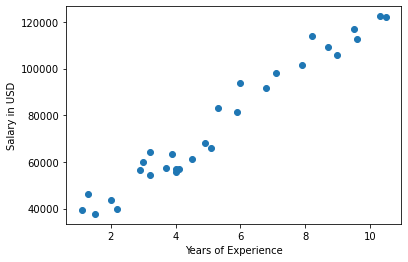

In [3]:
plt.scatter(df.YearsExperience, df.Salary)
plt.xlabel('Years of Experience')
plt.ylabel('Salary in USD')
plt.show()

In [4]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df.YearsExperience.values.reshape(-1, 1)

In [5]:
X[:5]

array([[1.1],
       [1.3],
       [1.5],
       [2. ],
       [2.2]])

In [6]:
# The shape of X is 30 samples, with a single feature (column)
X.shape

(30, 1)

In [7]:
y = df.Salary

In [8]:
# Create a model with scikit-learn
model = LinearRegression()

In [9]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X, y)

LinearRegression()

In [10]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(30,)


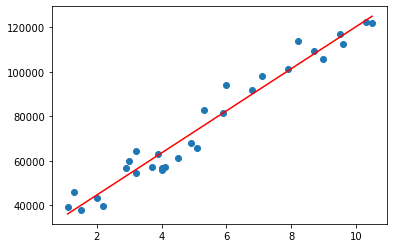

In [11]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [12]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[9449.96232146]
25792.200198668717


In [13]:
#17.3.1
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


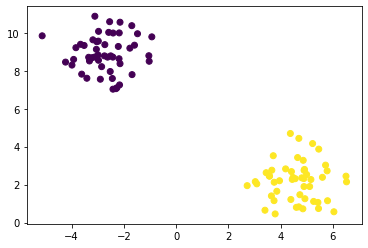

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [15]:
from sklearn.model_selection import train_test_split 
                                        #used to split a dataset
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1) #instantiate
classifier

LogisticRegression(random_state=1)

In [17]:
#let's breakdown each of these components later

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1)

In [18]:
#train the model
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [19]:
#create predictions and assemble dataframe
predictions = classifier.predict(X_test)
    # predict() creates predictions based on X_test

pd.DataFrame({"Prediction": predictions, "Actual": y_test})
    #creates a datframe of predicted values and actual values

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

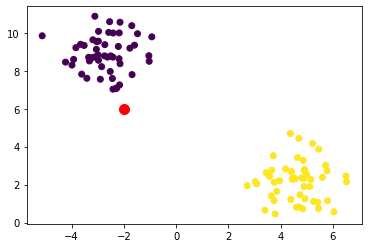

In [21]:
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [22]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]
